In [1]:
import galsim
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
true_psf = galsim.Moffat(fwhm=0.8, beta=3)
xar = []
yar = []
Tar = []
for x in np.linspace(-0.5, 0.5, 25):
    for y in np.linspace(-0.5, 0.5, 25):
        im = true_psf.drawImage(scale=0.263, nx=32, ny=32, offset=(x,y))
        hsm = im.FindAdaptiveMom()
        T = 2*hsm.moments_sigma**2
        xar.append(x)
        yar.append(y)
        Tar.append(T)

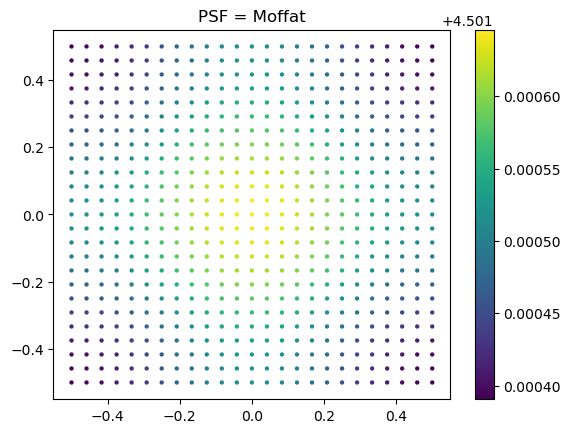

In [3]:
fig, ax = plt.subplots(1)
scat = ax.scatter(xar, yar, s=Tar, c=Tar)
ax.set_title('PSF = Moffat')
fig.colorbar(scat)
plt.show()

In [4]:
def fit_psf(im, scale=0.263, offset=(0,0), interp=galsim.Lanczos(7)):
    # Quick mock up of something like a Piff fitting.  Except we don't do the full pixel grid freedom.
    # It's just an image of a round moffat of some size put on an interpolated image.
    base_psf = galsim.Moffat(fwhm=1, beta=2)
    size_factor = 1
    size_image = im.FindAdaptiveMom().moments_sigma
    for iter in range(4):  # Just do 4 iterations always.  No convergence test.
        # Always convolve by native pixel scale.
        model = galsim.Convolve(base_psf.dilate(size_factor), galsim.Pixel(0.263))
        grid = model.drawImage(scale=scale, nx=17, ny=17, method='no_pixel')
        model_ii = galsim.InterpolatedImage(grid, x_interpolant=interp)
        model_im = model_ii.drawImage(im.copy(), offset=offset, method='no_pixel')
        size_model = model_im.FindAdaptiveMom().moments_sigma
        size_factor *= size_image / size_model
    return model_ii

In [5]:
psf_image = true_psf.drawImage(scale=0.263, nx=32, ny=32)
psf_model = fit_psf(psf_image)
xar = []
yar = []
Tar = []
for x in np.linspace(-0.5, 0.5, 25):
    for y in np.linspace(-0.5, 0.5, 25):
        im = psf_model.drawImage(scale=0.263, nx=32, ny=32, offset=(x,y), method='no_pixel')
        hsm = im.FindAdaptiveMom()
        T = 2*hsm.moments_sigma**2
        xar.append(x)
        yar.append(y)
        Tar.append(T)

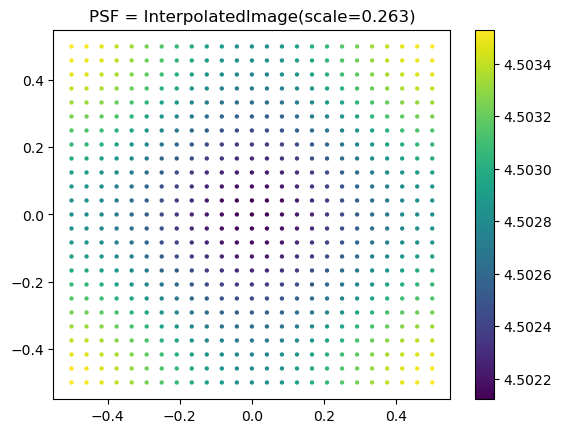

In [6]:
fig, ax = plt.subplots(1)
scat = ax.scatter(xar, yar, s=Tar, c=Tar)
fig.colorbar(scat)
ax.set_title('PSF = InterpolatedImage(scale=0.263)')
plt.show()

In [7]:
psf_image = true_psf.drawImage(scale=0.263, nx=32, ny=32)
psf_model = fit_psf(psf_image, scale=0.3)
xar = []
yar = []
Tar = []
for x in np.linspace(-0.5, 0.5, 25):
    for y in np.linspace(-0.5, 0.5, 25):
        im = psf_model.drawImage(scale=0.263, nx=32, ny=32, offset=(x,y), method='no_pixel')
        hsm = im.FindAdaptiveMom()
        T = 2*hsm.moments_sigma**2
        xar.append(x)
        yar.append(y)
        Tar.append(T)

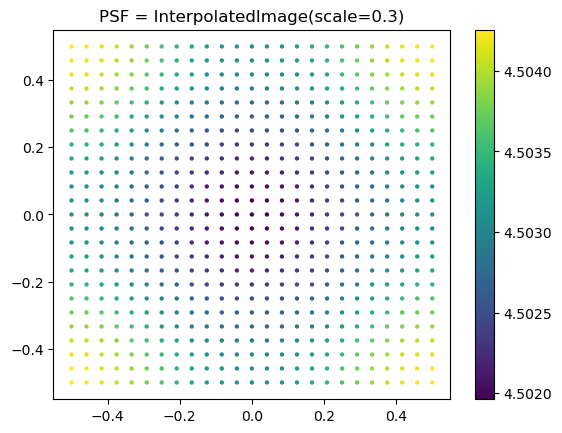

In [8]:
fig, ax = plt.subplots(1)
scat = ax.scatter(xar, yar, s=Tar, c=Tar)
fig.colorbar(scat)
ax.set_title('PSF = InterpolatedImage(scale=0.3)')
plt.show()

In [9]:
xar = []
yar = []
Tar = []
for x in np.linspace(-0.5, 0.5, 25):
    for y in np.linspace(-0.5, 0.5, 25):
        psf_image = true_psf.drawImage(scale=0.263, nx=32, ny=32, offset=(x,y))
        psf_model = fit_psf(psf_image, scale=0.3, offset=(x,y))
        im = psf_model.drawImage(scale=0.263, nx=32, ny=32, offset=(x,y), method='no_pixel')
        hsm = im.FindAdaptiveMom()
        T = 2*hsm.moments_sigma**2
        xar.append(x)
        yar.append(y)
        Tar.append(T)

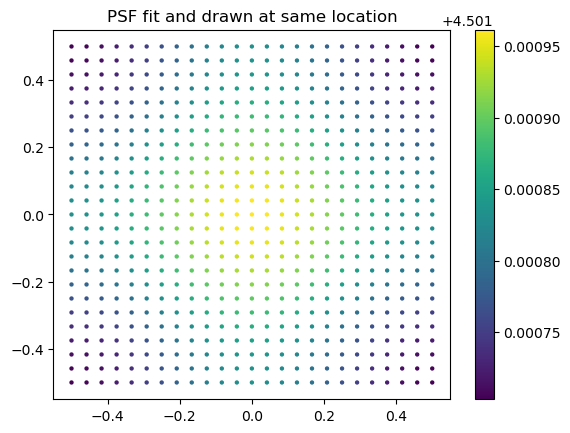

In [10]:
fig, ax = plt.subplots(1)
scat = ax.scatter(xar, yar, s=Tar, c=Tar)
fig.colorbar(scat)
ax.set_title('PSF fit and drawn at same location')
plt.show()

In [11]:
xar = []
yar = []
Tar = []
for x in np.linspace(-0.5, 0.5, 25):
    for y in np.linspace(-0.5, 0.5, 25):
        psf_image = true_psf.drawImage(scale=0.263, nx=32, ny=32, offset=(x,y))
        psf_model = fit_psf(psf_image, scale=0.3, offset=(x,y))
        im = psf_model.drawImage(scale=0.263, nx=32, ny=32, method='no_pixel')
        hsm = im.FindAdaptiveMom()
        T = 2*hsm.moments_sigma**2
        xar.append(x)
        yar.append(y)
        Tar.append(T)

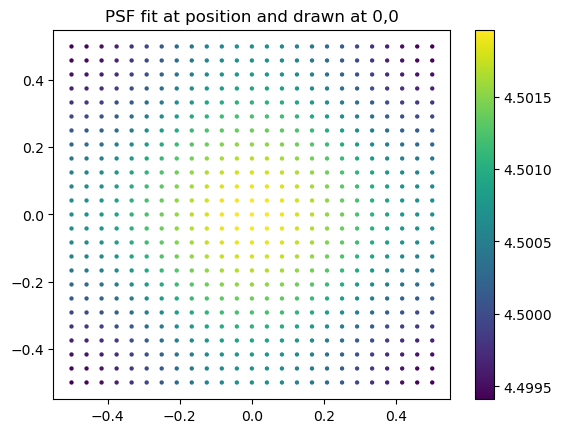

In [12]:
fig, ax = plt.subplots(1)
scat = ax.scatter(xar, yar, s=Tar, c=Tar)
fig.colorbar(scat)
ax.set_title('PSF fit at position and drawn at 0,0')
plt.show()

In [13]:
xar = []
yar = []
Tar = []
for x in np.linspace(-0.5, 0.5, 25):
    for y in np.linspace(-0.5, 0.5, 25):
        psf_image = true_psf.drawImage(scale=0.263, nx=32, ny=32, offset=(x,y))
        psf_model = fit_psf(psf_image, scale=0.3, offset=(x,y), interp=galsim.Lanczos(3))
        im = psf_model.drawImage(scale=0.263, nx=32, ny=32, method='no_pixel')
        hsm = im.FindAdaptiveMom()
        T = 2*hsm.moments_sigma**2
        xar.append(x)
        yar.append(y)
        Tar.append(T)

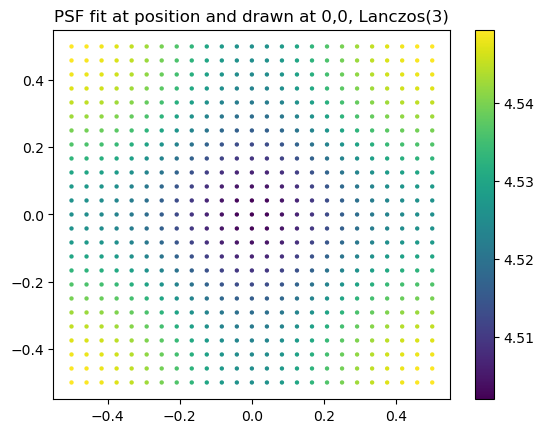

In [14]:
fig, ax = plt.subplots(1)
scat = ax.scatter(xar, yar, s=Tar, c=Tar)
fig.colorbar(scat)
ax.set_title('PSF fit at position and drawn at 0,0, Lanczos(3)')
plt.show()

In [15]:
xar = []
yar = []
Tar = []
for x in np.linspace(-0.5, 0.5, 25):
    for y in np.linspace(-0.5, 0.5, 25):
        psf_image = true_psf.drawImage(scale=0.263, nx=32, ny=32, offset=(x,y))
        psf_model = fit_psf(psf_image, scale=0.3, offset=(x,y), interp=galsim.Lanczos(5))
        im = psf_model.drawImage(scale=0.263, nx=32, ny=32, method='no_pixel')
        hsm = im.FindAdaptiveMom()
        T = 2*hsm.moments_sigma**2
        xar.append(x)
        yar.append(y)
        Tar.append(T)

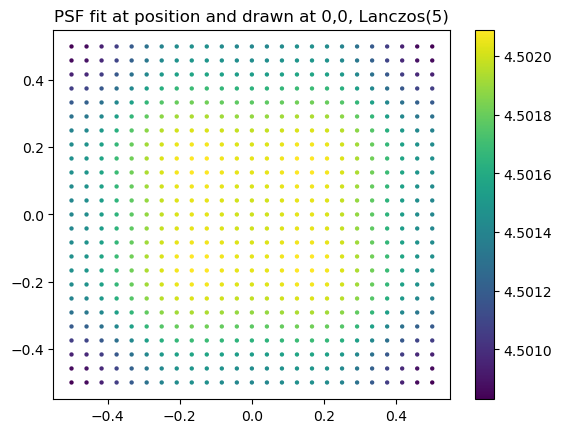

In [16]:
fig, ax = plt.subplots(1)
scat = ax.scatter(xar, yar, s=Tar, c=Tar)
fig.colorbar(scat)
ax.set_title('PSF fit at position and drawn at 0,0, Lanczos(5)')
plt.show()